In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#To display matplotlib graphics directly in the notebook 
%matplotlib inline 


import warnings
warnings.filterwarnings("ignore")

In [3]:
#import dataset as a dataframe

ipl_dataset = pd.read_csv('C:/Users/AISHA/Desktop/Datasets/ipl_2022_dataset.csv')

In [4]:
#To view dataset

ipl_dataset.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [5]:
#To check the number of players(rows and columns)

ipl_dataset.shape

(633, 8)

In [6]:
#Using the info function to chek the number of non-null objects

ipl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [7]:
#To get the column names in the dataframe

ipl_dataset.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [8]:
for column in ipl_dataset.columns:
    print(f"Column: {column}")
    print(ipl_dataset[column])
    print("\n")

Column: Unnamed: 0
0        0
1        1
2        2
3        3
4        4
      ... 
628    628
629    629
630    630
631    631
632    632
Name: Unnamed: 0, Length: 633, dtype: int64


Column: Player
0                 Rashid Khan
1               Hardik Pandya
2             Lockie Ferguson
3               Rahul Tewatia
4                Shubman Gill
                ...          
628              Sairaj Patil
629                Monu Singh
630    Nivethan Radhakrishnan
631              Lance Morris
632              Aaron Hardie
Name: Player, Length: 633, dtype: object


Column: Base Price
0      Draft Pick
1      Draft Pick
2            2 Cr
3         40 Lakh
4      Draft Pick
          ...    
628       20 Lakh
629       20 Lakh
630       20 Lakh
631       20 Lakh
632       20 Lakh
Name: Base Price, Length: 633, dtype: object


Column: TYPE
0           BOWLER
1      ALL-ROUNDER
2           BOWLER
3      ALL-ROUNDER
4           BATTER
          ...     
628         BATTER
629         BOWL

In [9]:
#to remove any leading or trailing whitespaces from the column name before dropping it

if isinstance(ipl_dataset.columns[0], str):
    ipl_dataset.columns = ipl_dataset.columns.str.strip()

In [10]:
if "Unnamed" in ipl_dataset.columns:
    column_exists = True
else:
    column_exists = False

print(column_exists)

False


In [11]:
#How to remove/drop a column that is not useful/necessary
#Using the drop function
#Using an if-else statement to drop a column

#axis is used to specify row or column, "axis=1" is for columns and "axis=0" is for rows
#"inplace" is used to permanenty remove the row/columnr



print("Columns before dropping 'Unnamed: 0':", ipl_dataset.columns.tolist())

if 'Unnamed: 0' in ipl_dataset.columns:
    ipl_dataset.reset_index(drop=True, inplace=True)
    ipl_dataset.drop('Unnamed: 0', axis=1, inplace=True)
    print("Column 'Unnamed: 0' dropped.")
else:
    print("Column 'Unnamed: 0' does not exist.")

print("Columns after dropping 'Unnamed: 0':", ipl_dataset.columns.tolist())

Columns before dropping 'Unnamed: 0': ['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)', '2021 Squad', 'Team']
Column 'Unnamed: 0' dropped.
Columns after dropping 'Unnamed: 0': ['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)', '2021 Squad', 'Team']


In [12]:
ipl_dataset.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [13]:
#To check the null columns

ipl_dataset.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [14]:
#To check for rows with a particular column as null
#To check for null rows in a column

ipl_dataset[ipl_dataset["Cost IN $ (000)"].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [15]:
#To fill the empty spaces with zero

ipl_dataset["Cost IN $ (000)"]=ipl_dataset["Cost IN $ (000)"].fillna(0)
ipl_dataset["COST IN ₹ (CR.)"]=ipl_dataset["COST IN ₹ (CR.)"].fillna(0)

In [16]:
#checking for null values in a column
#To check for rows with a particular column as null        
#To check for null rows in a column

ipl_dataset[ipl_dataset["2021 Squad"].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [17]:
#replacing null values

ipl_dataset["2021 Squad"]=ipl_dataset["2021 Squad"].fillna("Not participated")

In [18]:
#To confirm that all null values have been filled

ipl_dataset.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [19]:
ipl_dataset.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [20]:
#To check for rows that have a column fulfilling a condition and print a result without repetition 

teams= ipl_dataset[ipl_dataset["COST IN ₹ (CR.)"]>0]["Team"].unique()

In [21]:
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [22]:
#Creating a new column

ipl_dataset["Status"]=ipl_dataset["Team"].replace(teams, "sold")

In [23]:
#To check for duplicate rows
#To remove duplicated rows

ipl_dataset[ipl_dataset["Player"].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold


In [24]:
#To check the number of players in the ipl auction

#This gives the number of rows and columns
ipl_dataset.shape



(633, 8)

In [25]:
#To check the number of players in the ipl auctio

#To check the number of rows
ipl_dataset.shape[0]

633

In [26]:
#To count the different types of players that participated

types=ipl_dataset["TYPE"].value_counts()
types.reset_index()

,TYPE,count
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

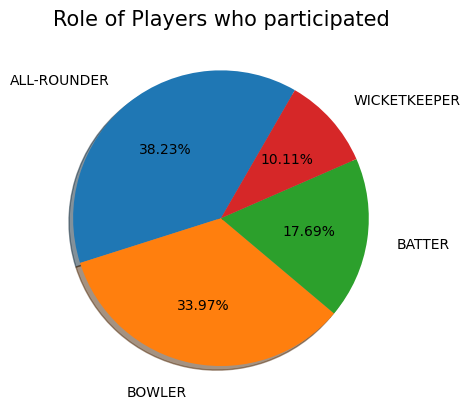

In [27]:
#Plotting a piechart
#Pie chart for players that participated

plt.pie(types.values, labels=types.index, labeldistance=1.2, autopct="%1.2f%%", shadow=True, startangle=60)
plt.title("Role of Players who participated", fontsize=15)
plt.plot()

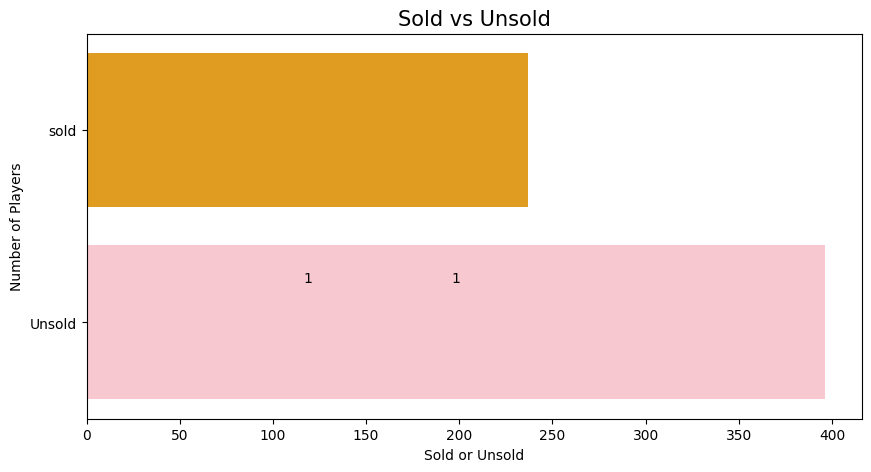

In [28]:
#Plotting a bar chart
#Bar chart for players who were sold or unsold

plt.figure(figsize=(10,5))
fig=sns.countplot(ipl_dataset["Status"],palette=["Orange", "Pink"])
plt.xlabel("Sold or Unsold")
plt.ylabel("Number of Players")
plt.title("Sold vs Unsold", fontsize=15)
plt.plot

for p in fig.patches:
    fig.annotate(format(p.get_height(), ".0f"), (p.get_x() + 
    p.get_width()/2., p.get_height()), ha = "center", va = "center", 
    xytext = (0,4), textcoords = 'offset points')

In [29]:
ipl_dataset.groupby('Status')['Player'].count()

Status
Unsold    396
sold      237
Name: Player, dtype: int64